# New York City Taxi Trip Duration

Share code and data to improve ride time predictions

## Contents

1. EDA
  1. 데이터 확인
  1. Correlation 분석
      1. heatmap
      1. pairplot
      1. VIF
1. rough modeling
  - 결과 진단
      1. 잔차 정규성 검정
          - plot (residual - feature)
      1. 이분산 검정
          - scatter plot (residual - feature)
      1. 자기상관 검정
          - PCA 결정
      1. target-feature check
          1. partial regression plot
          1. ccpr plot
1. 컬럼별 최적 정규화
1. modeling
  1. model with outlier
  1. model w/o outlier
  1. 결과 진단
      1. 잔차 정규성 검정
      1. 이분산 검정
      1. 자기상관 검정
      1. target-feature check
1. Cross validation 결과
1. Kaggle 결과
1. 결론

---

In [2]:
from taxi_pakage import *
from encoding_data import *

/usr/local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
# 추가로 필요한 함수 (지도)
from ipyleaflet import *
import time

---

# 1. EDA

## 1.1 Data check

### 1.1.1 Data information

In [3]:
# data set
taxi = pd.read_csv('train.csv')
taxi.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.98,40.75,-73.99,40.74,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.00,40.75,-73.97,40.80,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.96,40.77,-74.00,40.71,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.98,40.75,-73.97,40.76,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.98,40.78,-73.97,40.79,N,198


In [4]:
# 데이터 크기
taxi.shape # 1,458,644개 데이터, 11개의 컬럼으로 구성

(1458644, 11)

In [5]:
# 데이터에 대한 정보 (컬럼 개수, null값 여부, 데이터 유형)
taxi.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


- object : id, pickup_datetime, dropoff_datetime, store_and_fwd_flag
- int : vendor_id, passenger_count, trip_duration
- float : pickup_logitude, pickup_latitude, dropoff_logitude, dropoff_latitude

| Values | Meaning |
|-|-|
|id | a unique identifier for each trip |
|vendor_id | a code indicating the provider associated with the trip record |
|pickup_datetime|date and time when the meter was engaged |
|dropoff_datetime|date and time when the meter was disengaged|
|passenger_count|the number of passengers in the vehicle (driver entered value)|
|pickup_longitude|the longitude where the meter was engaged|
|pickup_latitude| the latitude where the meter was engaged|
|dropoff_longitude| the longitude where the meter was disngaged|
|dropoff_latitude| the latitude where the meter was disengaged|
|store_and_fwd_flag|This indicates whether the trip record was held in vehicle memory |
|trip_duration|duration of the trip in seconds|

In [6]:
# Descriptive statistics
taxi.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00
mean,1.53,1.66,-73.97,40.75,-73.97,40.75,959.49
std,0.50,1.31,0.07,0.03,0.07,0.04,5237.43
min,1.00,0.00,-121.93,34.36,-121.93,32.18,1.00
25%,1.00,1.00,-73.99,40.74,-73.99,40.74,397.00
50%,2.00,1.00,-73.98,40.75,-73.98,40.75,662.00
75%,2.00,2.00,-73.97,40.77,-73.96,40.77,1075.00
max,2.00,9.00,-61.34,51.88,-61.34,43.92,3526282.00


### 1.1.2 Countplot

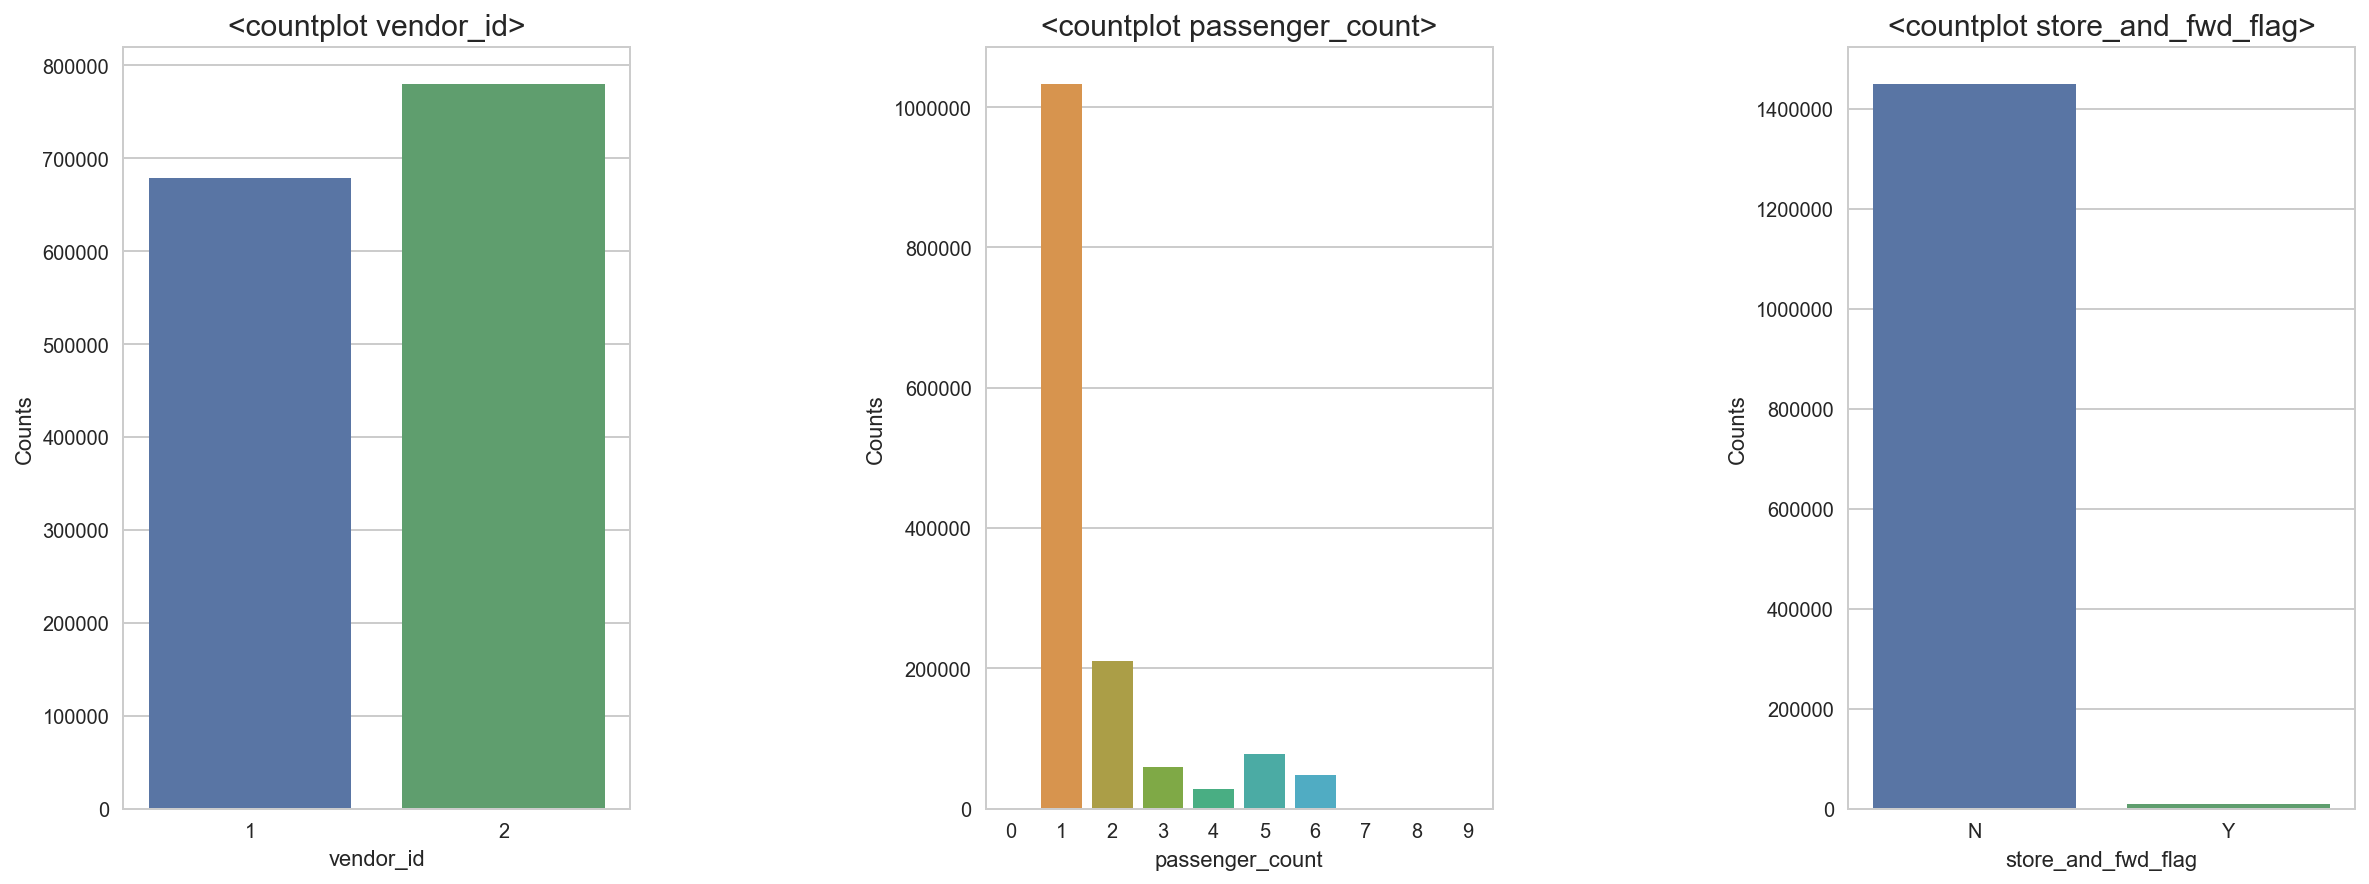

In [7]:
# countplot
plt.figure(figsize=(20, 7))
plt.subplots_adjust(wspace = 0.7)

# vendor_id
plt.subplot(131)
sns.countplot(x = 'vendor_id', data = taxi)
plt.title('<countplot vendor_id>', fontsize = 15)
plt.xlabel('vendor_id')
plt.ylabel('Counts')

# passenger_count
plt.subplot(132)
sns.countplot(x = 'passenger_count', data = taxi)
plt.title('<countplot passenger_count>', fontsize = 15)
plt.xlabel('passenger_count')
plt.ylabel('Counts')

# store_and_fwd_flag
plt.subplot(133)
sns.countplot(x = 'store_and_fwd_flag', data = taxi)
plt.title('<countplot store_and_fwd_flag>', fontsize = 15)
plt.xlabel('store_and_fwd_flag')
plt.ylabel('Counts')

plt.show()

### 1.1.3 Boxplot

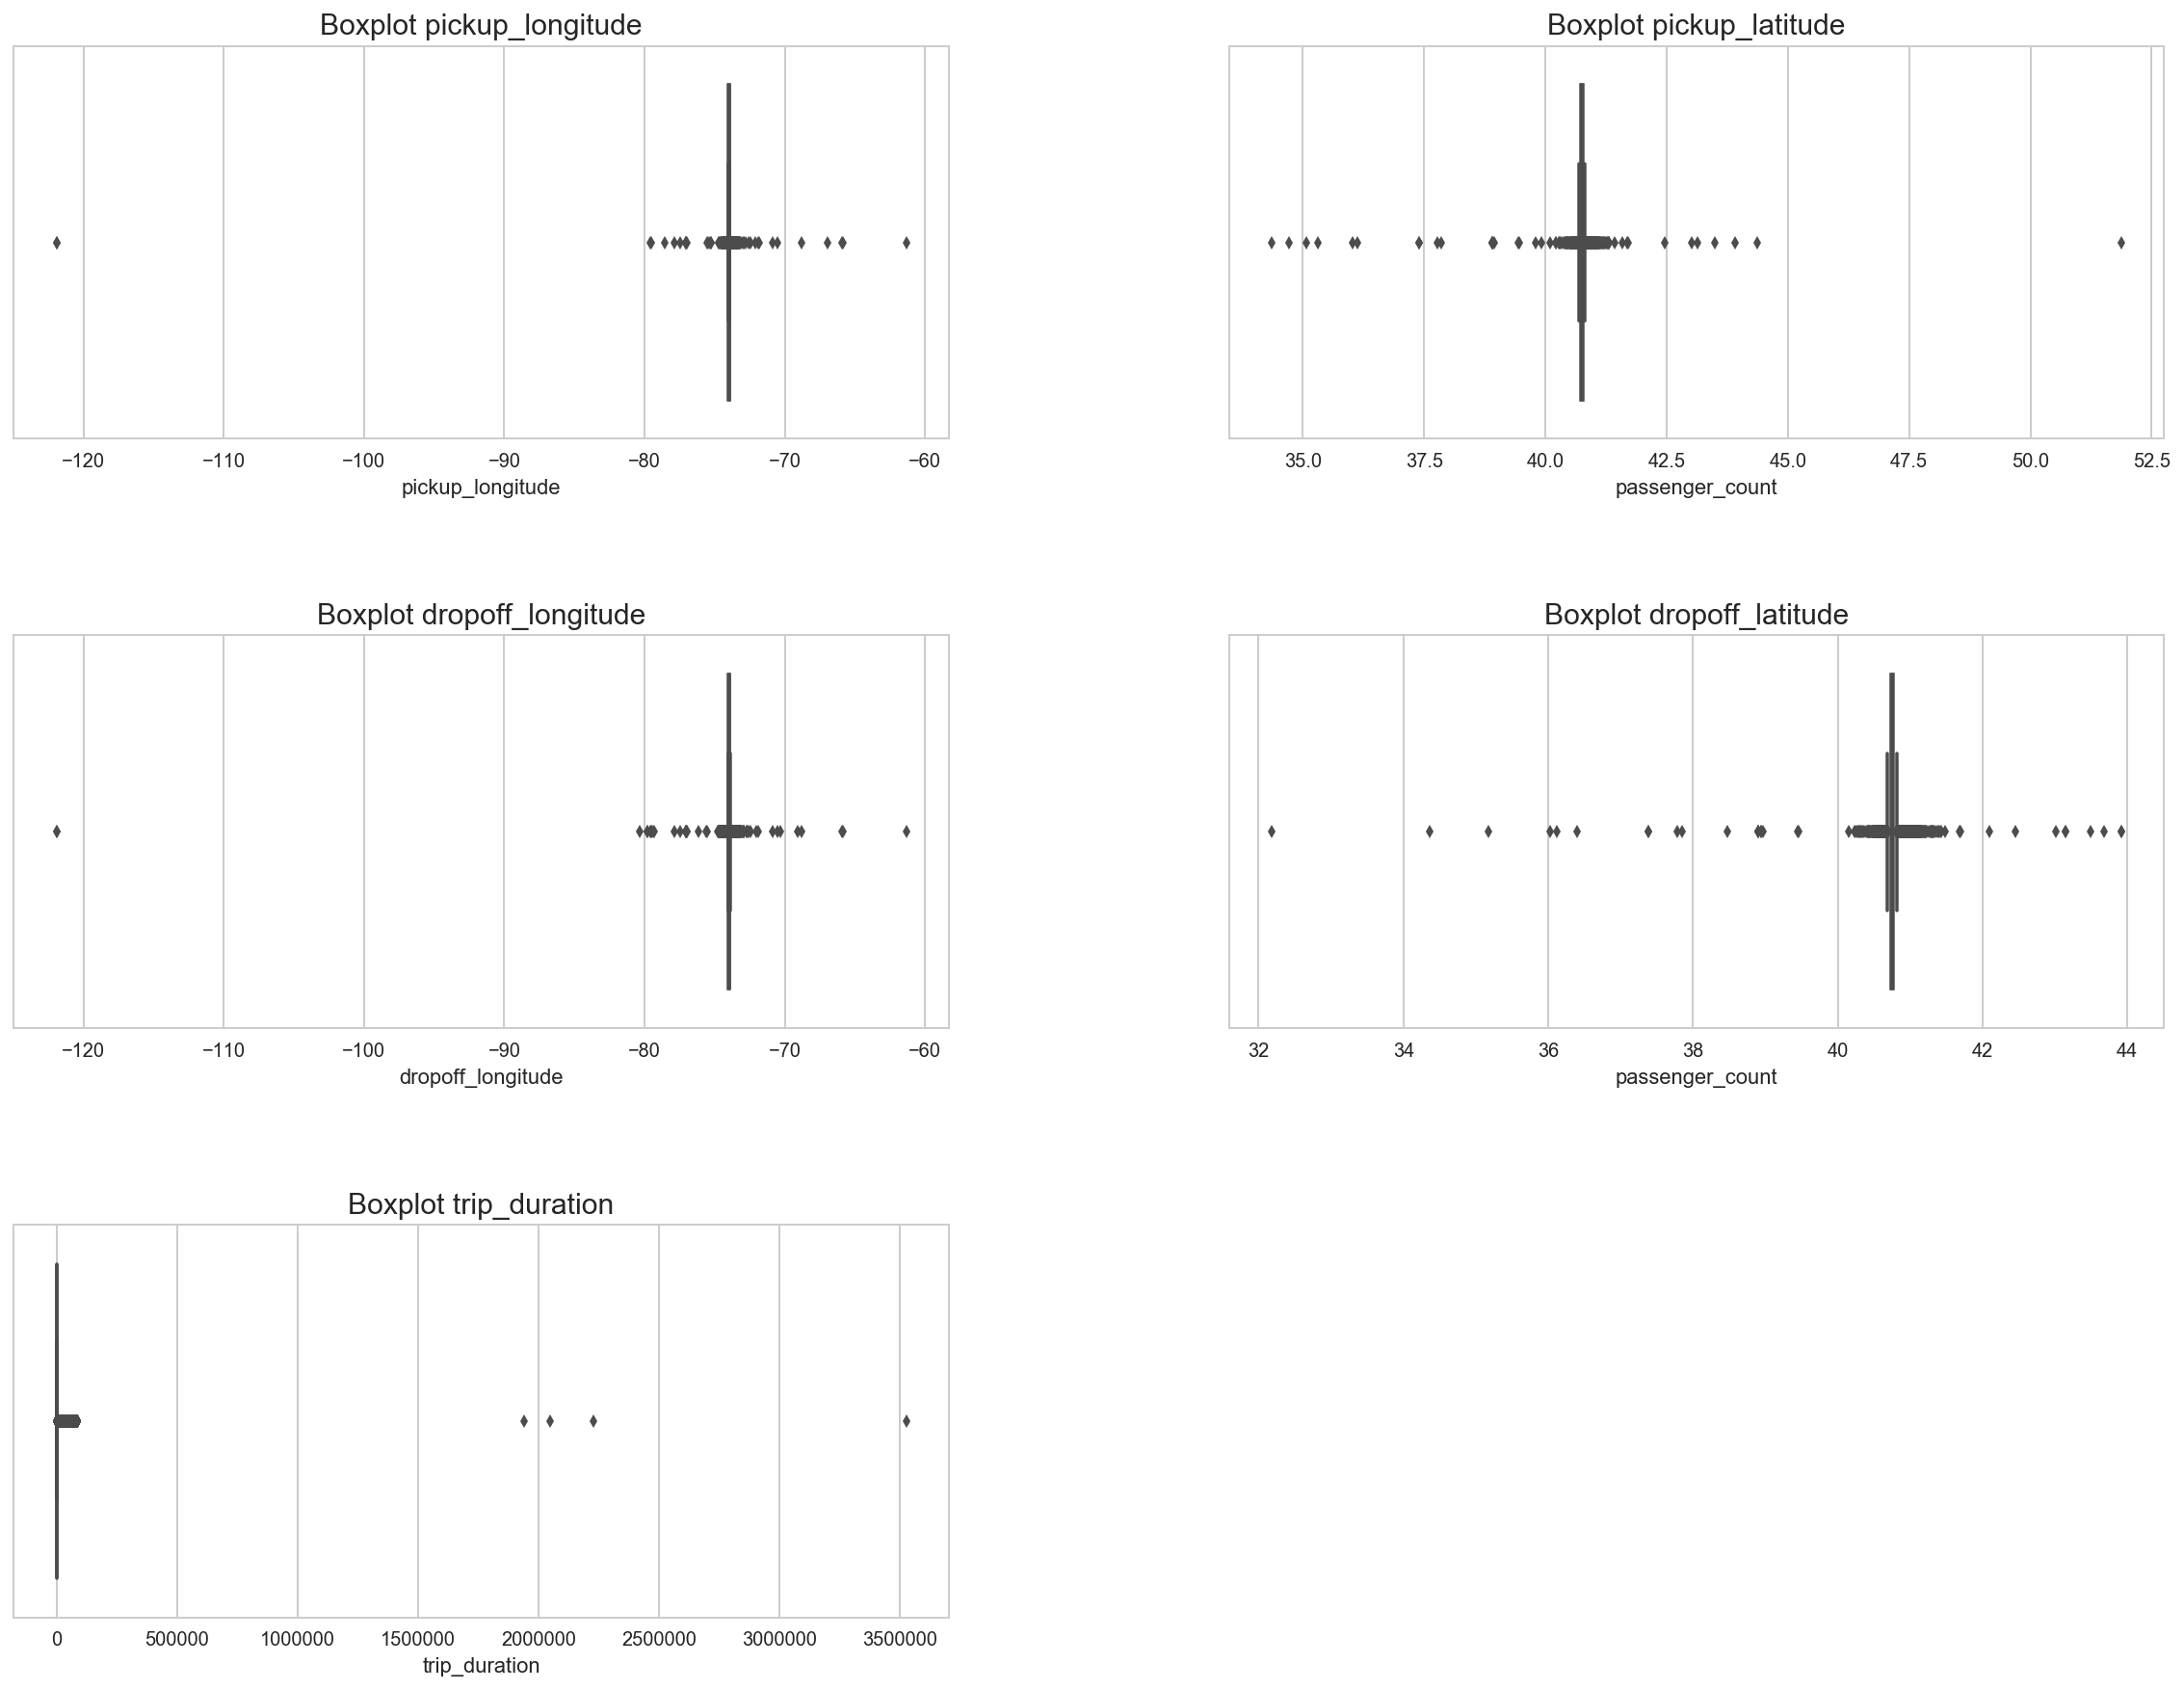

In [8]:
# boxplot
plt.figure(figsize=(20, 15))
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)

# pickup_longitude
plt.subplot(321)
sns.boxplot(x = 'pickup_longitude', data = taxi)
plt.title('Boxplot pickup_longitude', fontsize = 15)
plt.xlabel('pickup_longitude')

# pickup_latitude
plt.subplot(322)
sns.boxplot(x = 'pickup_latitude', data = taxi)
plt.title('Boxplot pickup_latitude', fontsize = 15)
plt.xlabel('passenger_count')

# dropoff_longitude
plt.subplot(323)
sns.boxplot(x = 'dropoff_longitude', data = taxi)
plt.title('Boxplot dropoff_longitude', fontsize = 15)
plt.xlabel('dropoff_longitude')

# dropoff_latitude
plt.subplot(324)
sns.boxplot(x = 'dropoff_latitude', data = taxi)
plt.title('Boxplot dropoff_latitude', fontsize = 15)
plt.xlabel('passenger_count')

# Trip_druation
plt.subplot(325)
sns.boxplot(x = 'trip_duration', data = taxi)
plt.title('Boxplot trip_duration', fontsize = 15)
plt.xlabel('trip_duration')

plt.show()

### 1.1.4 Histogram

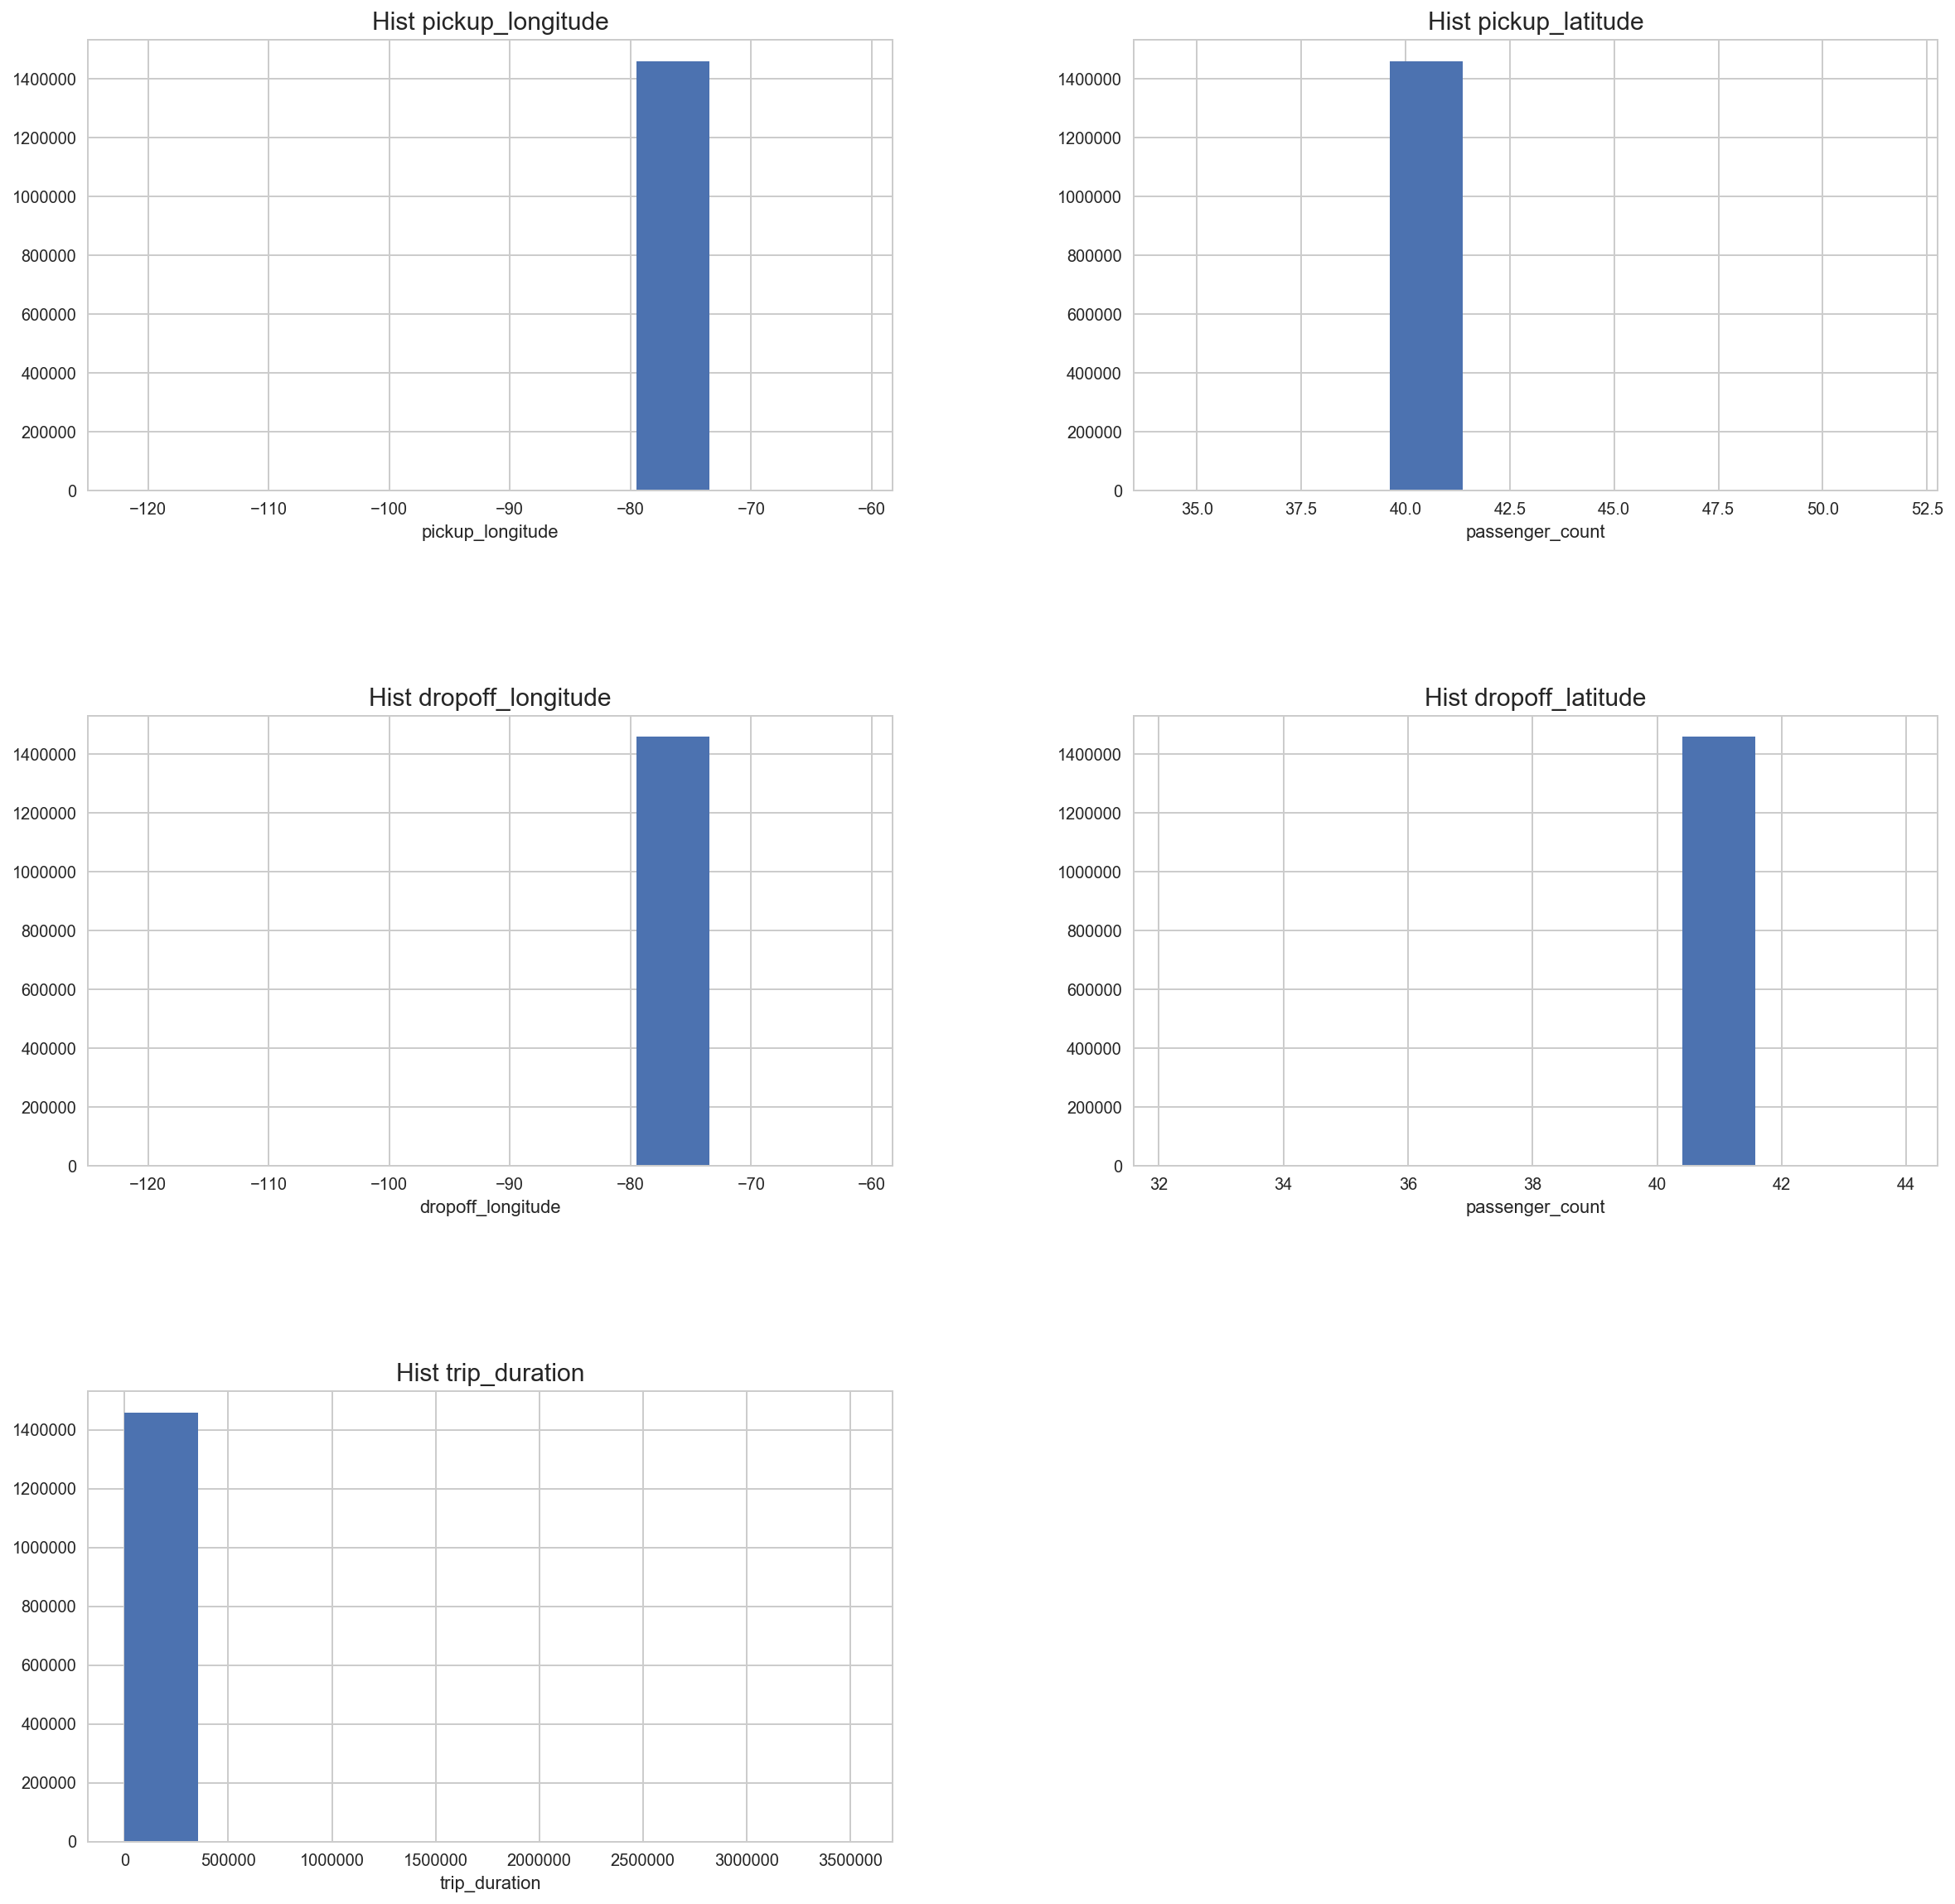

In [9]:
# histogram
plt.figure(figsize=(20, 20))
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)

# pickup_longitude
plt.subplot(321)
plt.hist(x = 'pickup_longitude', data = taxi)
plt.title('Hist pickup_longitude', fontsize = 15)
plt.xlabel('pickup_longitude')

# pickup_latitude
plt.subplot(322)
plt.hist(x = 'pickup_latitude', data = taxi)
plt.title('Hist pickup_latitude', fontsize = 15)
plt.xlabel('passenger_count')

# dropoff_longitude
plt.subplot(323)
plt.hist(x = 'dropoff_longitude', data = taxi)
plt.title('Hist dropoff_longitude', fontsize = 15)
plt.xlabel('dropoff_longitude')

# dropoff_latitude
plt.subplot(324)
plt.hist(x = 'dropoff_latitude', data = taxi)
plt.title('Hist dropoff_latitude', fontsize = 15)
plt.xlabel('passenger_count')

# Trip_druation
plt.subplot(325)
plt.hist(x = 'trip_duration', data = taxi)
plt.title('Hist trip_duration', fontsize = 15)
plt.xlabel('trip_duration')

plt.show()

### 1.1.5 Map

In [10]:
# pick_up
center_1 = [40.7830603, -73.9712488] # [위도, 경도]
zoom_1 = 12
m = Map(center = center_1, zoom = zoom_1) 
m

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map data (c) <a href="https://openstreetmap.org">OpenStreetMap</a> contributors'}, center=[40.7830603, -73.9712488], default_tiles=TileLayer(max_zoom=19, min_zoom=1, options=['attribution', 'detect_retina', 'max_zoom', 'min_zoom', 'opacity', 'tile_size']), layers=(TileLayer(max_zoom=19, min_zoom=1, options=['attribution', 'detect_retina', 'max_zoom', 'min_zoom', 'opacity', 'tile_size']),), layout=Layout(align_self='stretch', height='400px'), options=['attribution_control', 'basemap', 'bounce_at_zoom_limits', 'box_zoom', 'center', 'close_popup_on_click', 'double_click_zoom', 'dragging', 'inertia', 'inertia_deceleration', 'inertia_max_speed', 'keyboard', 'keyboard_pan_offset', 'keyboard_zoom_offset', 'max_zoom', 'min_zoom', 'scroll_wheel_zoom', 'tap', 'tap_tolerance', 'touch_zoom', 'world_copy_jump', 'zoom', 'zoom_animation_threshold', 'zoom_control', 'zoom_start'])

In [11]:
taxi['pickup'] = list(zip(taxi['pickup_latitude'], taxi['pickup_longitude']))
pickup_sample = list(taxi['pickup'][0:10]) # 일단은 10개만
 
# Marker 표시
locs = pickup_sample
for loc in locs:
    marker = Marker(location=loc)
    m += marker
    time.sleep(0.5)

In [12]:
# dropoff
center_2 = [40.7830603, -73.9712488] # [위도, 경도]
zoom_2 = 12
m = Map(center = center_2, zoom = zoom_2)
m

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map data (c) <a href="https://openstreetmap.org">OpenStreetMap</a> contributors'}, center=[40.7830603, -73.9712488], default_tiles=TileLayer(max_zoom=19, min_zoom=1, options=['attribution', 'detect_retina', 'max_zoom', 'min_zoom', 'opacity', 'tile_size']), layers=(TileLayer(max_zoom=19, min_zoom=1, options=['attribution', 'detect_retina', 'max_zoom', 'min_zoom', 'opacity', 'tile_size']),), layout=Layout(align_self='stretch', height='400px'), options=['attribution_control', 'basemap', 'bounce_at_zoom_limits', 'box_zoom', 'center', 'close_popup_on_click', 'double_click_zoom', 'dragging', 'inertia', 'inertia_deceleration', 'inertia_max_speed', 'keyboard', 'keyboard_pan_offset', 'keyboard_zoom_offset', 'max_zoom', 'min_zoom', 'scroll_wheel_zoom', 'tap', 'tap_tolerance', 'touch_zoom', 'world_copy_jump', 'zoom', 'zoom_animation_threshold', 'zoom_control', 'zoom_start'])

In [13]:
taxi['dropoff'] = list(zip(taxi['dropoff_latitude'], taxi['dropoff_longitude']))
pickup= list(taxi['dropoff'][0:10]) 

# Marker 표시
locs = pickup_sample
for loc in locs:
    marker = Marker(location=loc)
    m += marker
    time.sleep(0.5)
    
taxi = taxi.drop(['pickup', 'dropoff'], axis = 1)    

## 1.2 Data edit / add

### 1.2.1 Data edit

In [14]:
# 분석을 위한 숫자화
# id 숫자화 - 분석을 위해 숫자화
taxi['id'] = taxi['id'].apply(lambda x: x[2:])

# store_and_fwd_flag -  N, Y 를 0, 1 숫자로 변경
taxi['store_and_fwd_flag'] = taxi['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)

# pickup_datetime, dropoff_datetime 형식 바꿈 (2016.01.01 기준)
taxi['pickup_datetime'] = taxi['pickup_datetime'].apply(strptime)
taxi['dropoff_datetime'] = taxi['dropoff_datetime'].apply(strptime)

### 1.2.2 Data add

In [15]:
# 좌표를 이용해 거리 생성
taxi['dist'] = haversine_np(taxi['pickup_longitude'], taxi['pickup_latitude'], 
                            taxi['dropoff_longitude'], taxi['dropoff_latitude'])

# date를 세분화
taxi['pick_date'] = taxi['pickup_datetime'].apply(date_to_zero)
taxi['pick_time'] = taxi['pickup_datetime'].apply(time_to_zero)
taxi['drop_time'] = taxi['dropoff_datetime'].apply(time_to_zero)

# 요일 표시 (0:월, 1:화, 2:수, 3:목, 4:금, 5:토, 6:일)
taxi['weekday'] = taxi['pickup_datetime'].apply(week_num)

# holiday는 휴일인지(2) 아닌지(1) 카테고리값 부여
taxi['holiday'] = taxi['pickup_datetime'].apply(holiday)

In [16]:
taxi.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist,pick_date,pick_time,drop_time,weekday,holiday
1458639,2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.98,40.75,-73.99,40.74,0,778,1.22,98,48663,49441,5,1
1458640,1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.00,40.75,-73.97,40.80,0,655,6.05,9,27314,27969,7,1
1458641,2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.96,40.77,-74.00,40.71,0,764,7.82,112,25060,25824,5,1
1458642,2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.98,40.75,-73.97,40.76,0,373,1.09,4,57385,57758,2,1
1458643,1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.98,40.78,-73.97,40.79,0,198,1.13,95,53064,53262,2,1


### 1.2.3 Data set

In [17]:
# 최종 데이터
# 차후 분석을 위해 연속형 데이터, 카테고리 데이터, y(trip_duration)순으로 재배치
x_1 = taxi['vendor_id']
x_2 = taxi['passenger_count']
x_3 = taxi['store_and_fwd_flag']
y = taxi['trip_duration'] 

taxi = taxi.drop(['vendor_id', 'passenger_count' , 'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime', 'trip_duration'], axis = 1)

taxi['vendor_id'] = x_1
taxi['passenger_count'] = x_2
taxi['store_and_fwd_flag'] = x_3 
taxi['trip_duration'] = y
taxi.tail()

,id,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,dist,pick_date,pick_time,drop_time,weekday,holiday,vendor_id,passenger_count,store_and_fwd_flag,trip_duration
1458639,2376096,-73.98,40.75,-73.99,40.74,1.22,98,48663,49441,5,1,2,4,0,778
1458640,1049543,-74.00,40.75,-73.97,40.80,6.05,9,27314,27969,7,1,1,1,0,655
1458641,2304944,-73.96,40.77,-74.00,40.71,7.82,112,25060,25824,5,1,2,1,0,764
1458642,2714485,-73.98,40.75,-73.97,40.76,1.09,4,57385,57758,2,1,1,1,0,373
1458643,1209952,-73.98,40.78,-73.97,40.79,1.13,95,53064,53262,2,1,1,1,0,198


In [18]:
taxi.to_csv('edited_taxi.csv', index = False)

## 1.3 Correlation

In [19]:
# Trip_duration에서 나타난 4개의 이상치 제거
taxi_EDA = taxi[taxi['trip_duration'] < 1500000].reset_index(drop=True)

### 1.3.1 countplot

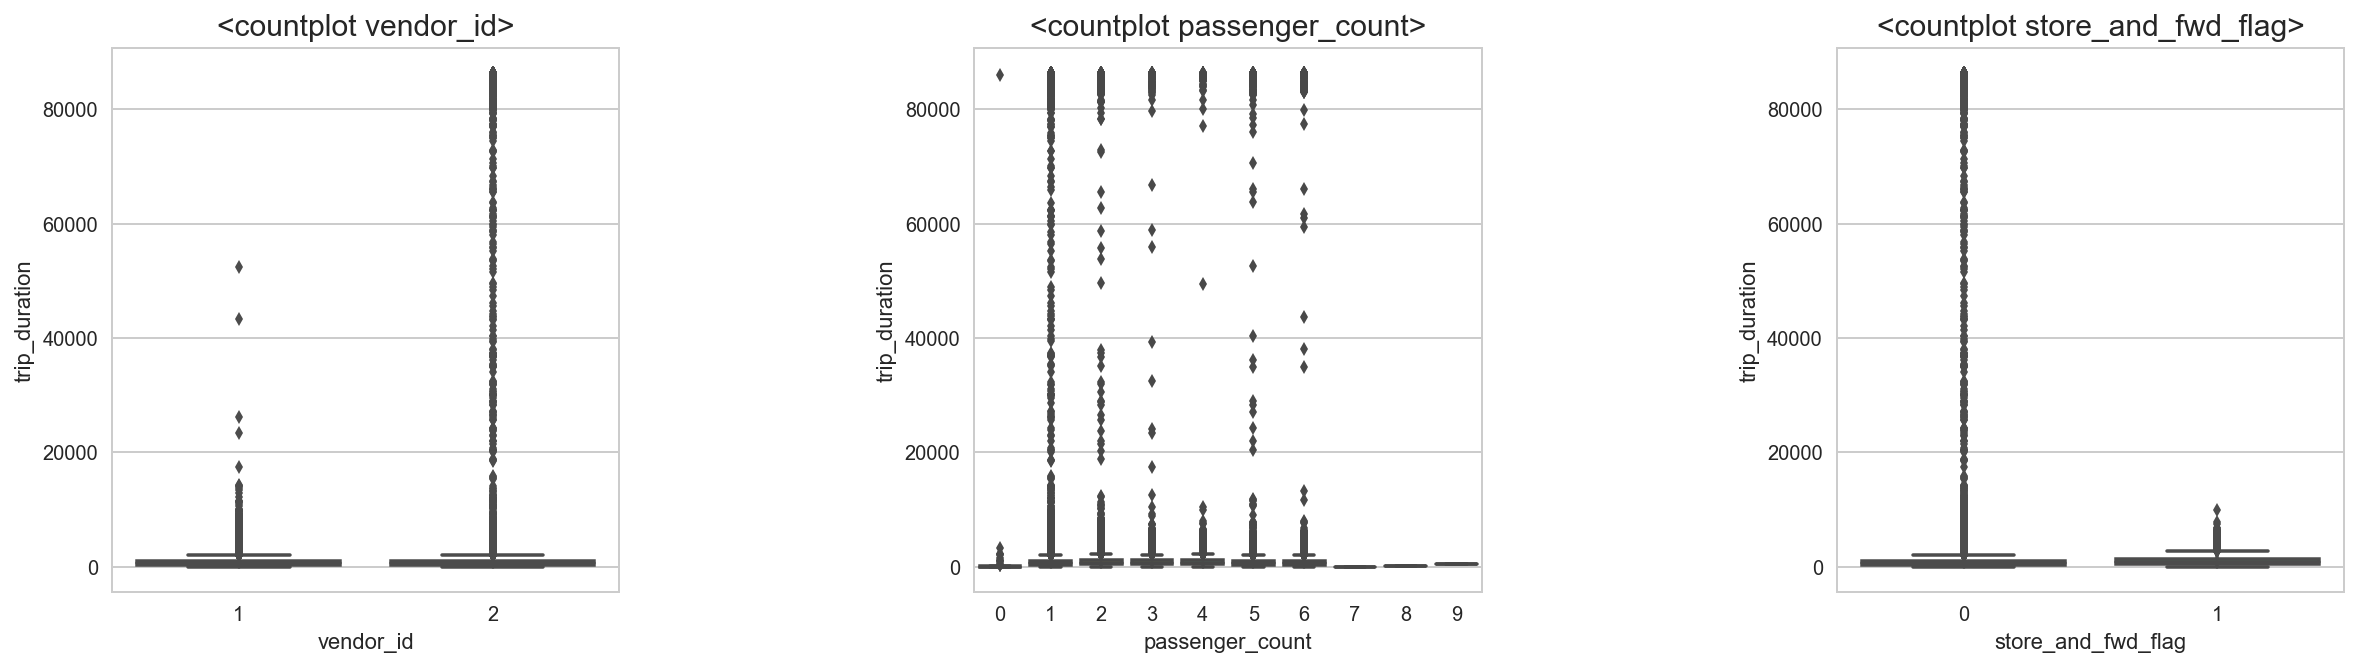

In [20]:
# countplot
plt.figure(figsize=(20, 5))
plt.subplots_adjust(wspace = 0.7)

# vendor_id
plt.subplot(131)
sns.boxplot(x = 'vendor_id', y = 'trip_duration', data = taxi_EDA)
plt.title('<countplot vendor_id>', fontsize = 15)
plt.xlabel('vendor_id')
plt.ylabel('trip_duration')

# passenger_count
plt.subplot(132)
sns.boxplot(x = 'passenger_count', y = 'trip_duration', data = taxi_EDA)
plt.title('<countplot passenger_count>', fontsize = 15)
plt.xlabel('passenger_count')
plt.ylabel('trip_duration')

# store_and_fwd_flag
plt.subplot(133)
sns.boxplot(x = 'store_and_fwd_flag', y = 'trip_duration', data = taxi_EDA)
plt.title('<countplot store_and_fwd_flag>', fontsize = 15)
plt.xlabel('store_and_fwd_flag')
plt.ylabel('trip_duration')

plt.show()

### 1.3.2 heatmap

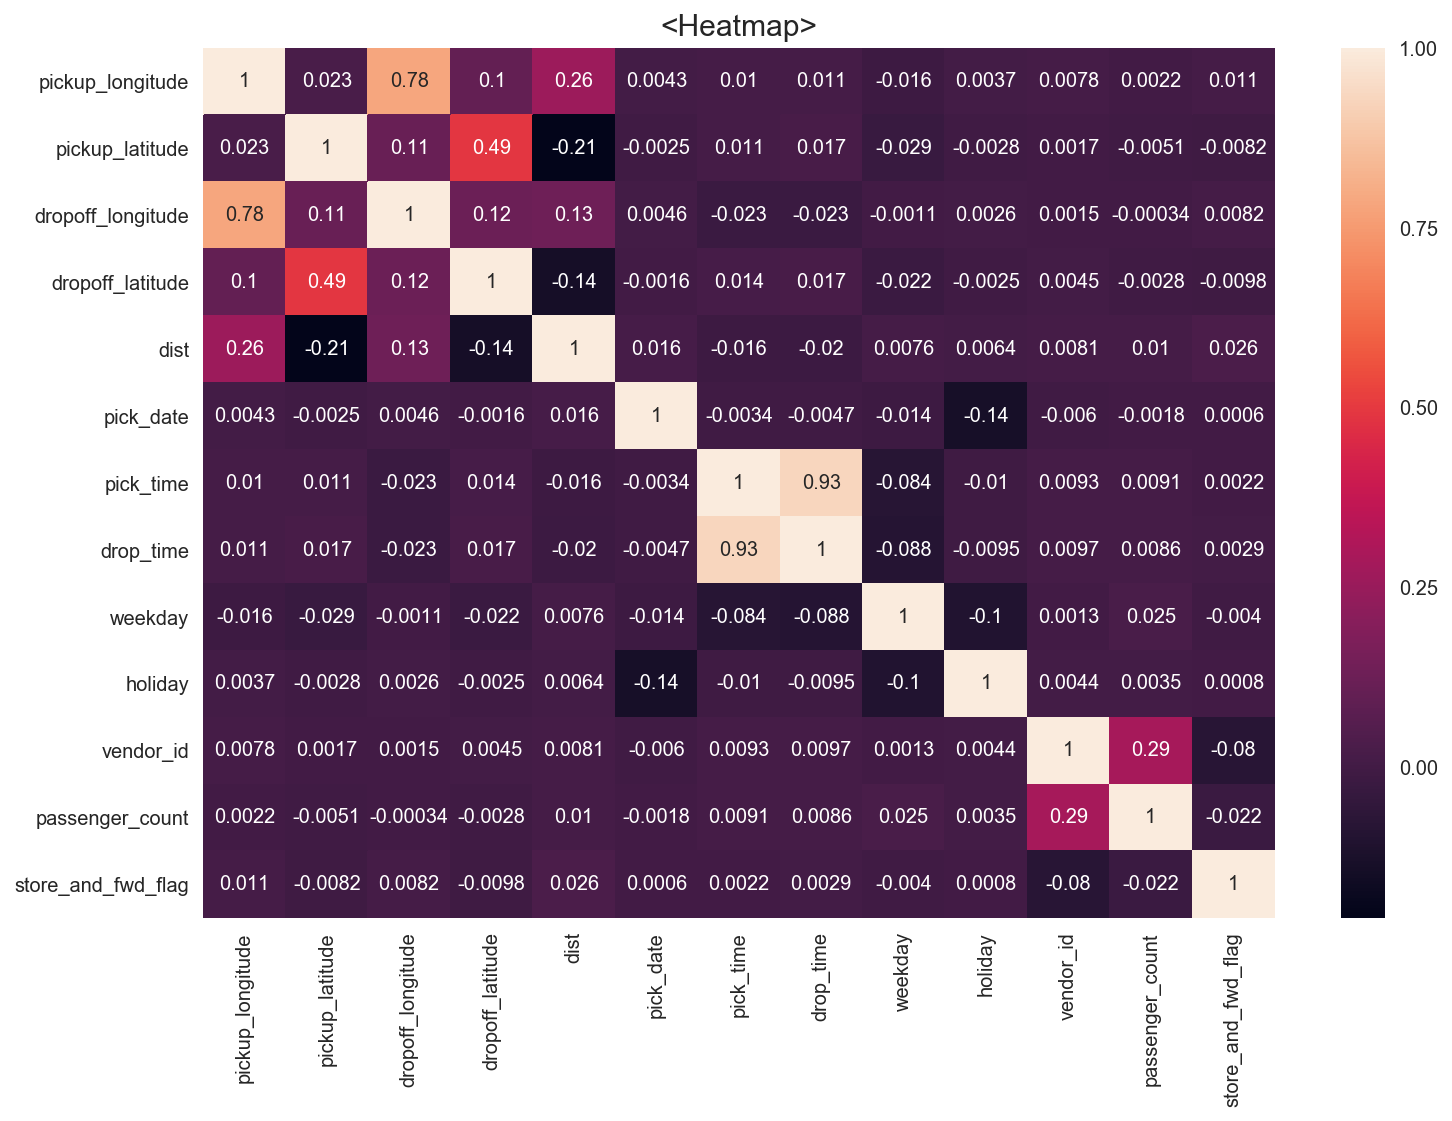

In [21]:
f, ax = plt.subplots(figsize=(12, 8))
taxi_heatmap = taxi_EDA.drop(['trip_duration'], axis = 1)
sns.heatmap(taxi_heatmap.corr(), annot=True)
plt.title("<Heatmap>", fontsize = 15)
plt.show()

### 1.3.3 pairplot

In [22]:
# 오래 걸려서 일단 패스
# taxi_pair = taxi_EDA.drop(['vendor_id', 'passenger_count', 'store_and_fwd_flag', 'pick_time', 'drop_time'], axis = 1)
# sns.pairplot(taxi_pair)

### 1.3.4 VIF

** `id를 빼야 VIF가 먹는데 그 이유를 잘 모르겠습니다ㅜㅜ` **

In [24]:
taxi_vif = taxi_EDA.drop(['id', 'trip_duration'], axis = 1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(taxi_vif.values, i) for i in range(taxi_vif.shape[1])]
vif["features"] = taxi_vif.columns
vif

,VIF Factor,features
0,2932620.41,pickup_longitude
1,1682313.47,pickup_latitude
2,2736535.46,dropoff_longitude
3,1477381.79,dropoff_latitude
4,1.71,dist
5,4.19,pick_date
6,44.62,pick_time
7,43.71,drop_time
8,5.41,weekday
9,45.63,holiday


---

# 2. Rough modeling

## 2.1 잔차 정규성 검정

In [4]:
# feature 변수 개수, 변수 목록을 보여줌
taxi = pd.read_csv("edited_taxi.csv")
feature_n, features = get_features(taxi)
feature_n, features

(15,
 'id + pickup_longitude + pickup_latitude + dropoff_longitude + dropoff_latitude + dist + pick_date + pick_time + drop_time + weekday + holiday + vendor_id + passenger_count + store_and_fwd_flag + trip_duration')

In [5]:
# 분석을 위한 데이터 셋팅 (intercept추가)
taxi_1 = dmatrix('{}'.format(features), taxi, return_type = 'dataframe')
taxi_1.tail()

,Intercept,id,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,dist,pick_date,pick_time,drop_time,weekday,holiday,vendor_id,passenger_count,store_and_fwd_flag,trip_duration
1458639,1.00,2376096.00,-73.98,40.75,-73.99,40.74,1.22,98.00,48663.00,49441.00,5.00,1.00,2.00,4.00,0.00,778.00
1458640,1.00,1049543.00,-74.00,40.75,-73.97,40.80,6.05,9.00,27314.00,27969.00,7.00,1.00,1.00,1.00,0.00,655.00
1458641,1.00,2304944.00,-73.96,40.77,-74.00,40.71,7.82,112.00,25060.00,25824.00,5.00,1.00,2.00,1.00,0.00,764.00
1458642,1.00,2714485.00,-73.98,40.75,-73.97,40.76,1.09,4.00,57385.00,57758.00,2.00,1.00,1.00,1.00,0.00,373.00
1458643,1.00,1209952.00,-73.98,40.78,-73.97,40.79,1.13,95.00,53064.00,53262.00,2.00,1.00,1.00,1.00,0.00,198.00


In [6]:
# 독립변수 X 생성
feature_n_1, features_1 = get_features(taxi_1, 1, -1) # Intercept, trip_duration 제거
feature_n_1, features_1

(14,
 'id + pickup_longitude + pickup_latitude + dropoff_longitude + dropoff_latitude + dist + pick_date + pick_time + drop_time + weekday + holiday + vendor_id + passenger_count + store_and_fwd_flag')

In [7]:
# Modeling, summary
model_1 =  sm.OLS.from_formula("trip_duration ~ {}".format(features_1), data = taxi_1)
result_1 = model_1.fit()
result_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1015.
Date:                Tue, 13 Mar 2018   Prob (F-statistic):               0.00
Time:                        16:41:11   Log-Likelihood:            -1.4554e+07
No. Observations:             1458644   AIC:                         2.911e+07
Df Residuals:                 1458629   BIC:                         2.911e+07
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.023e+05   8493.067     12.046      0.000    8.57e+04    1.19e+05
id                 -8.155e-06   3.74e-06     -2.182      0.029   -1.55e-05    -8.3e-07
pickup_longitude     -25.9003    101.892     -0.254      0.799    -225.605     173.804
pickup_latitude    -1369.3814    154.253     -8.877      0.000   -1671.712   -1067.051
dropoff_longitude    316.4521    100.094      3.162      0.002     120.271     512.634
dropoff_latitude    -606.9214    139.448     -4.352      0.000    -880.235    -333.608
dist                 112.0741      1.076    104.183      0.000     109.966     114.182
pick_date              0.4856      0.085      5.743      0.000       0.320       0.651
pick_time             -0.0046      0.001     -8.958      0.000      -0.006      -0.004
drop_time              0.0061      0.001     11.963      0.000       0.005       0.007
weekday               -3.7525      2.233     -1.681      0.093      -8.129       0.624
holiday             -107.8441     28.120     -3.835      0.000    -162.958     -52.730
vendor_id            199.8535      9.062     22.055      0.000     182.093     217.614
passenger_count        8.0735      3.430      2.354      0.019       1.351      14.796
store_and_fwd_flag    49.0105     58.482      0.838      0.402     -65.613     163.634
================================================================================
Omnibus:                  8314604.750   Durbin-Watson:                     2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   2324412381811969.500
Skew:                         347.728   Prob(JB):                           0.00
Kurtosis:                  195565.153   Cond. No.                       4.55e+09
================================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.55e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

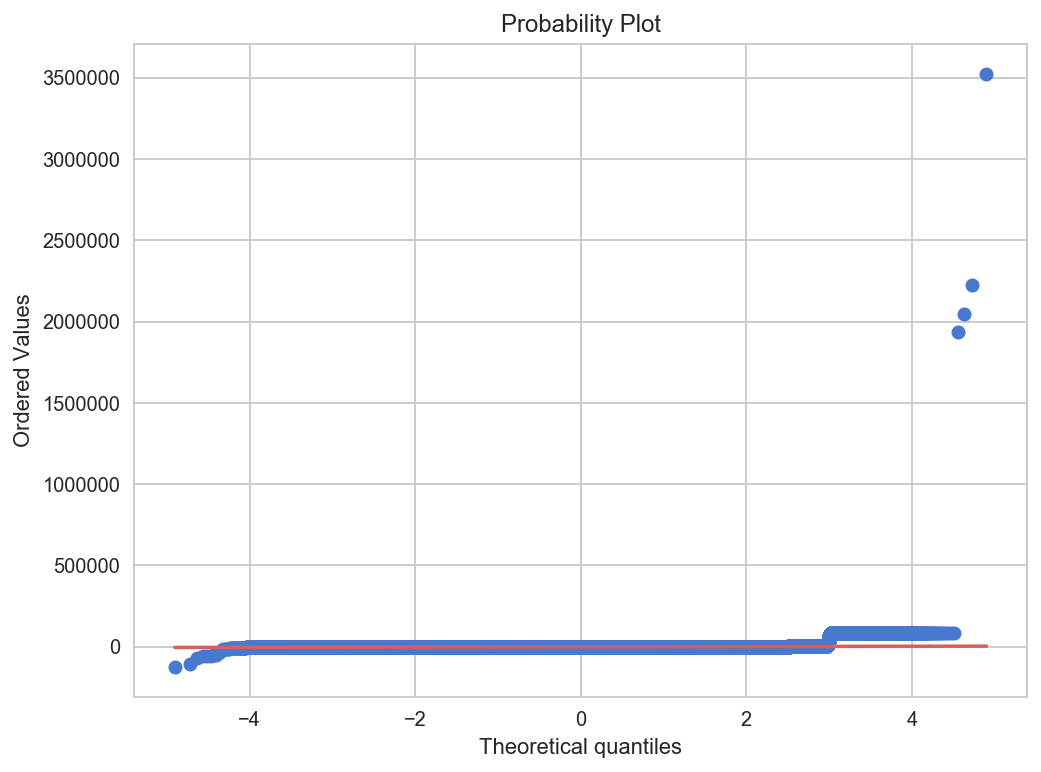

In [8]:
# probplot
f, ax = plt.subplots(figsize=(8, 6))
sp.stats.probplot(result_1.resid, plot = plt)
plt.show()

In [9]:
# Resid test1 
test_resid1 = sms.omni_normtest(result_1.resid)
for xi in zip(['Chi^2', 'P-value'], test_resid1):
    print("%-12s: %6.3f" % xi)

Chi^2       : 8314604.750
P-value     :  0.000


In [10]:
# Resid test2     
test_resid2 = sms.jarque_bera(result_1.resid)
for xi in zip(['Jarque-Bera', 'P-value', 'Skew', 'Kurtosis'], test_resid2):
    print("%-12s: %6.3f" % xi)

Jarque-Bera : 2324412381811969.500
P-value     :  0.000
Skew        : 347.728
Kurtosis    : 195565.153


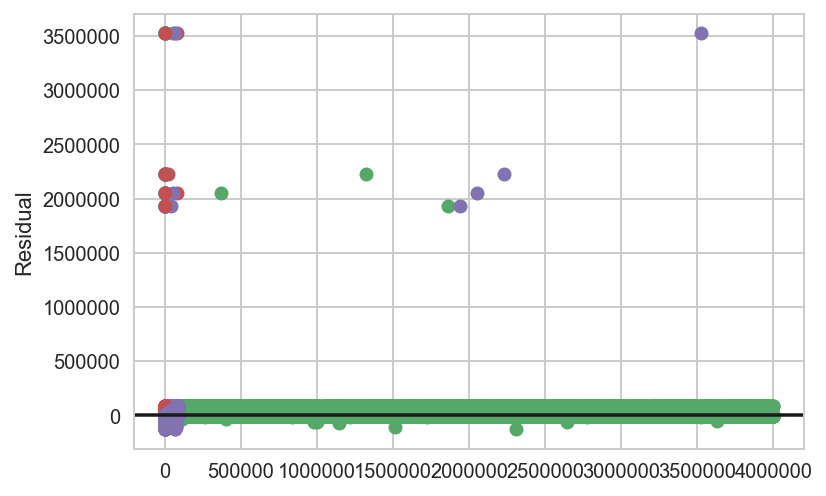

In [11]:
# x값에 따른 잔차의 분포 
plt.plot(taxi_1, result_1.resid, 'o')
plt.axhline(y=0, c='k')
plt.ylabel("Residual")
plt.show()

## 2.2 이분산 검정

In [12]:
# 시간 오래걸려서 일단 생략
# plt.scatter(taxi, result_1.resid)
# plt.show()

## 2.3 자기상관 검정

### Durbin-Watson 검정

In [13]:
result_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1015.
Date:                Tue, 13 Mar 2018   Prob (F-statistic):               0.00
Time:                        16:42:17   Log-Likelihood:            -1.4554e+07
No. Observations:             1458644   AIC:                         2.911e+07
Df Residuals:                 1458629   BIC:                         2.911e+07
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.023e+05   8493.067     12.046      0.000    8.57e+04    1.19e+05
id                 -8.155e-06   3.74e-06     -2.182      0.029   -1.55e-05    -8.3e-07
pickup_longitude     -25.9003    101.892     -0.254      0.799    -225.605     173.804
pickup_latitude    -1369.3814    154.253     -8.877      0.000   -1671.712   -1067.051
dropoff_longitude    316.4521    100.094      3.162      0.002     120.271     512.634
dropoff_latitude    -606.9214    139.448     -4.352      0.000    -880.235    -333.608
dist                 112.0741      1.076    104.183      0.000     109.966     114.182
pick_date              0.4856      0.085      5.743      0.000       0.320       0.651
pick_time             -0.0046      0.001     -8.958      0.000      -0.006      -0.004
drop_time              0.0061      0.001     11.963      0.000       0.005       0.007
weekday               -3.7525      2.233     -1.681      0.093      -8.129       0.624
holiday             -107.8441     28.120     -3.835      0.000    -162.958     -52.730
vendor_id            199.8535      9.062     22.055      0.000     182.093     217.614
passenger_count        8.0735      3.430      2.354      0.019       1.351      14.796
store_and_fwd_flag    49.0105     58.482      0.838      0.402     -65.613     163.634
================================================================================
Omnibus:                  8314604.750   Durbin-Watson:                     2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   2324412381811969.500
Skew:                         347.728   Prob(JB):                           0.00
Kurtosis:                  195565.153   Cond. No.                       4.55e+09
================================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.55e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 2.4 Target-feature check

---

# 3. Optimal regulize

## 3.1 Leverage (레버리지)

In [14]:
# (시간이 걸려서 일단 패스)
# influence = result.get_influence()
# hat = influence.hat_matrix_diag

# plt.figure(figsize = (10, 2))
# plt.stem(hat)
# plt.show()

## 3.2 Outlier (아웃라이어)

In [16]:
taxi_2, drop = erase_outlier_np(result_1, taxi_1, feature_n, dropped=True)
len(taxi_1), len(drop)

(1458644, 2318)

In [17]:
feature_n_2, features_2 = get_features(taxi_1, 1, -1)
feature_n_2, features_2

(14,
 'id + pickup_longitude + pickup_latitude + dropoff_longitude + dropoff_latitude + dist + pick_date + pick_time + drop_time + weekday + holiday + vendor_id + passenger_count + store_and_fwd_flag')

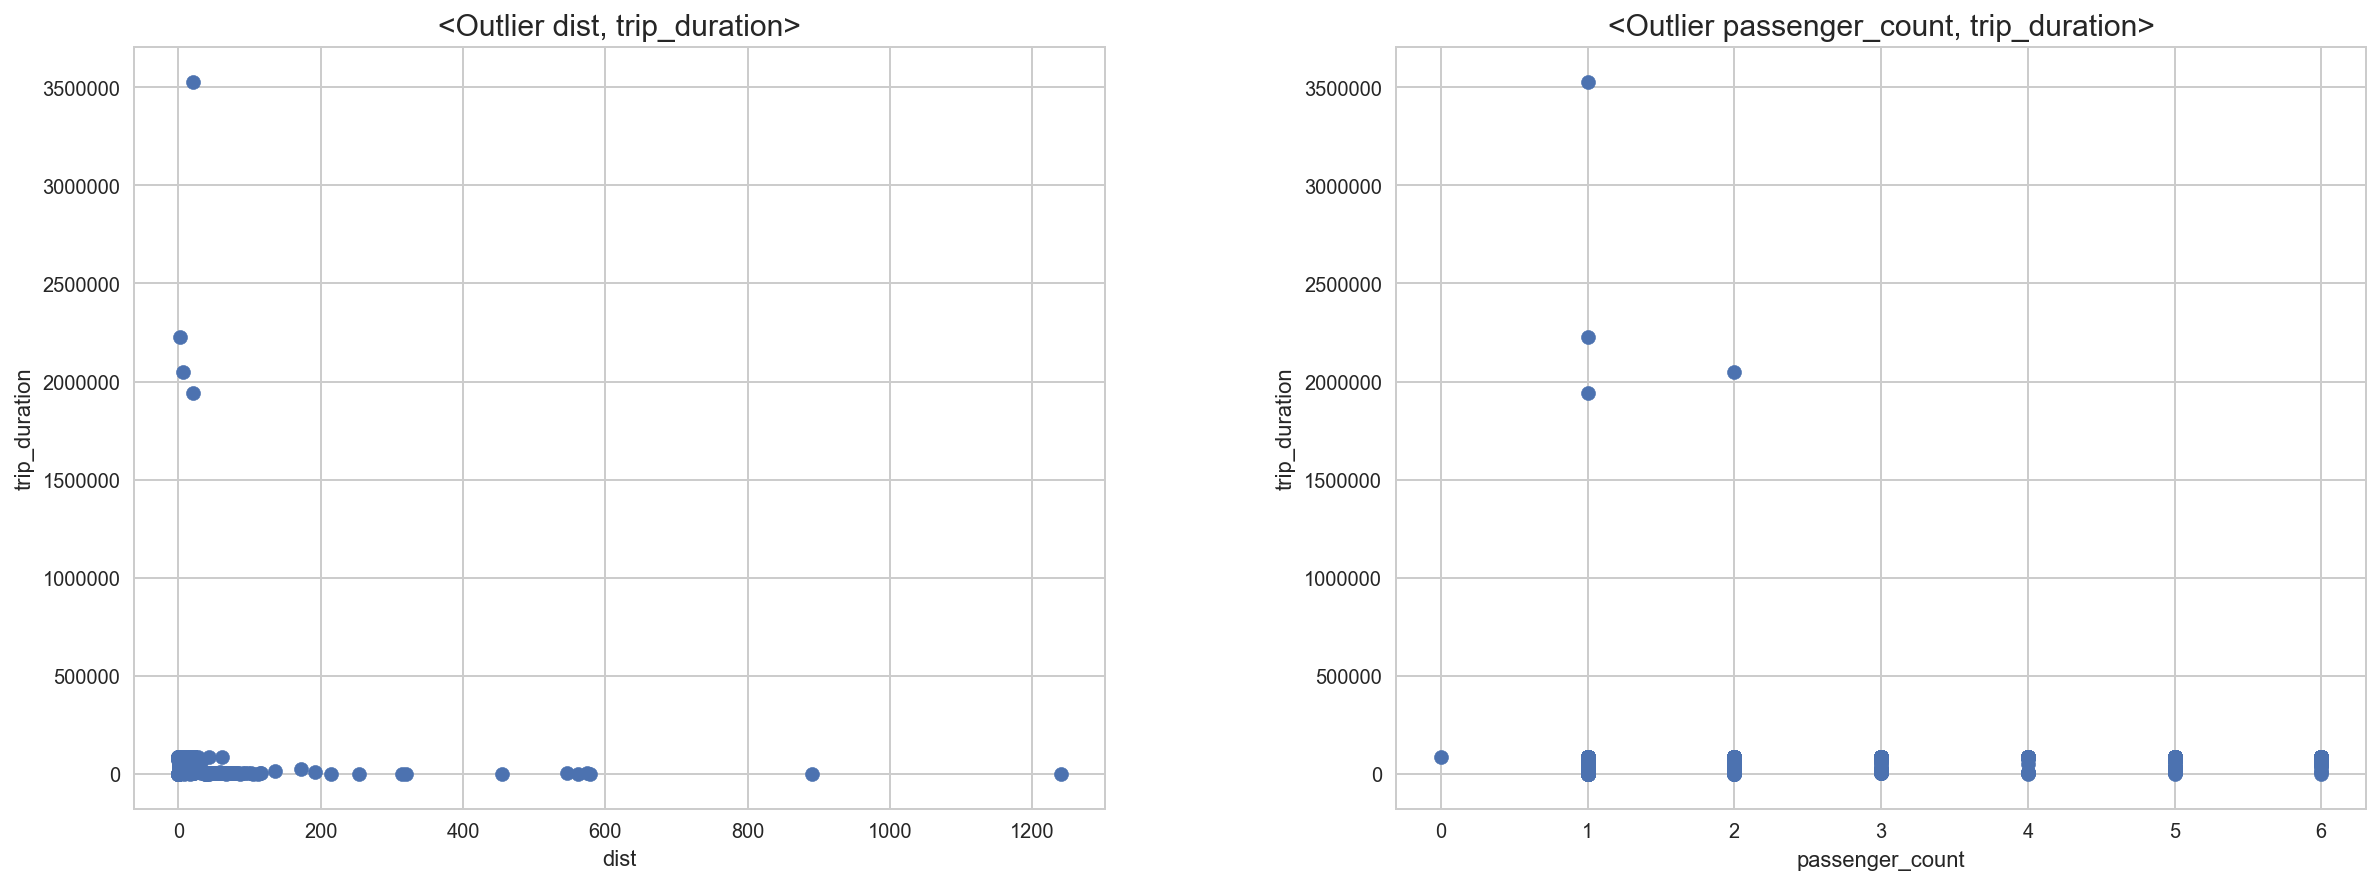

In [18]:
# Outlier
plt.figure(figsize = (20, 7))
plt.subplots_adjust(wspace = 0.3)

# outlier 제거 확인 (dist, trip_duration)
plt.subplot(121)
plt.scatter(drop['dist'], drop['trip_duration'])
plt.title('<Outlier dist, trip_duration>', fontsize = 15)
plt.xlabel('dist')
plt.ylabel('trip_duration')

# outlier 제거 확인 (passenger_count, trip_duration)
plt.subplot(122)
plt.scatter(drop['passenger_count'], drop['trip_duration'])
plt.title('<Outlier passenger_count, trip_duration>', fontsize = 15)
plt.xlabel('passenger_count')
plt.ylabel('trip_duration')

plt.show()

In [19]:
# 제거 후 결과
model_2 =  sm.OLS.from_formula("trip_duration ~ {}".format(features_1), data = taxi_2)
result_2 = model_2.fit()
result_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                 1.610e+05
Date:                Tue, 13 Mar 2018   Prob (F-statistic):               0.00
Time:                        16:42:46   Log-Likelihood:            -1.0833e+07
No. Observations:             1456326   AIC:                         2.167e+07
Df Residuals:                 1456311   BIC:                         2.167e+07
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -9.844e+04   1292.164    -76.182      0.000   -1.01e+05   -9.59e+04
id                  6.053e-07   2.95e-07      2.050      0.040    2.65e-08    1.18e-06
pickup_longitude    -558.1743     10.494    -53.188      0.000    -578.743    -537.606
pickup_latitude     1017.6884     14.099     72.183      0.000     990.055    1045.322
dropoff_longitude   -934.2945     10.458    -89.337      0.000    -954.792    -913.797
dropoff_latitude   -1301.1687     11.931   -109.059      0.000   -1324.553   -1277.785
dist                 135.7249      0.112   1217.121      0.000     135.506     135.943
pick_date              0.5475      0.007     81.937      0.000       0.534       0.561
pick_time             -0.0016    4.1e-05    -38.693      0.000      -0.002      -0.002
drop_time              0.0029   4.05e-05     70.701      0.000       0.003       0.003
weekday              -13.4496      0.177    -76.195      0.000     -13.796     -13.104
holiday             -105.0081      2.222    -47.260      0.000    -109.363    -100.653
vendor_id              0.8521      0.716      1.190      0.234      -0.551       2.255
passenger_count        3.4683      0.271     12.791      0.000       2.937       4.000
store_and_fwd_flag    34.3560      4.627      7.426      0.000      25.288      43.424
==============================================================================
Omnibus:                   782315.469   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         21436280.680
Skew:                           2.052   Prob(JB):                         0.00
Kurtosis:                      21.342   Cond. No.                     8.75e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.75e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 3.3 Scaling (스케일링)

In [20]:
# Scaling을 위한 데이터 setting
taxi_3 = taxi_2
taxi_3.tail()

,Intercept,id,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,dist,pick_date,pick_time,drop_time,weekday,holiday,vendor_id,passenger_count,store_and_fwd_flag,trip_duration
1456321,1.00,2376096.00,-73.98,40.75,-73.99,40.74,1.22,98.00,48663.00,49441.00,5.00,1.00,2.00,4.00,0.00,778.00
1456322,1.00,1049543.00,-74.00,40.75,-73.97,40.80,6.05,9.00,27314.00,27969.00,7.00,1.00,1.00,1.00,0.00,655.00
1456323,1.00,2304944.00,-73.96,40.77,-74.00,40.71,7.82,112.00,25060.00,25824.00,5.00,1.00,2.00,1.00,0.00,764.00
1456324,1.00,2714485.00,-73.98,40.75,-73.97,40.76,1.09,4.00,57385.00,57758.00,2.00,1.00,1.00,1.00,0.00,373.00
1456325,1.00,1209952.00,-73.98,40.78,-73.97,40.79,1.13,95.00,53064.00,53262.00,2.00,1.00,1.00,1.00,0.00,198.00


In [21]:
# Scale 부여
feature_n_3, features_3 = get_features(taxi_3, 1, -1, scale = True)
feature_n_3, features_3

(14,
 'scale(id) + scale(pickup_longitude) + scale(pickup_latitude) + scale(dropoff_longitude) + scale(dropoff_latitude) + scale(dist) + scale(pick_date) + scale(pick_time) + scale(drop_time) + scale(weekday) + scale(holiday) + scale(vendor_id) + scale(passenger_count) + scale(store_and_fwd_flag)')

In [22]:
# Scale data summary
model_3 =  sm.OLS.from_formula("trip_duration ~ {} ".format(features_3), data = taxi_3)
result_3 = model_3.fit()
result_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                 1.610e+05
Date:                Tue, 13 Mar 2018   Prob (F-statistic):               0.00
Time:                        16:47:01   Log-Likelihood:            -1.0833e+07
No. Observations:             1456326   AIC:                         2.167e+07
Df Residuals:                 1456311   BIC:                         2.167e+07
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   836.3487      0.341   2452.675      0.000     835.680     837.017
scale(id)                     0.6989      0.341      2.050      0.040       0.031       1.367
scale(pickup_longitude)     -21.4611      0.403    -53.188      0.000     -22.252     -20.670
scale(pickup_latitude)       28.6855      0.397     72.183      0.000      27.907      29.464
scale(dropoff_longitude)    -33.7539      0.378    -89.337      0.000     -34.494     -33.013
scale(dropoff_latitude)     -42.1093      0.386   -109.059      0.000     -42.866     -41.352
scale(dist)                 531.1975      0.436   1217.121      0.000     530.342     532.053
scale(pick_date)             28.2329      0.345     81.937      0.000      27.558      28.908
scale(pick_time)            -36.5392      0.944    -38.693      0.000     -38.390     -34.688
scale(drop_time)             66.8134      0.945     70.701      0.000      64.961      68.666
scale(weekday)              -26.2805      0.345    -76.195      0.000     -26.957     -25.604
scale(holiday)              -16.3706      0.346    -47.260      0.000     -17.050     -15.692
scale(vendor_id)              0.4250      0.357      1.190      0.234      -0.275       1.125
scale(passenger_count)        4.5561      0.356     12.791      0.000       3.858       5.254
scale(store_and_fwd_flag)     2.5416      0.342      7.426      0.000       1.871       3.212
==============================================================================
Omnibus:                   782315.469   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         21436280.680
Skew:                           2.052   Prob(JB):                         0.00
Kurtosis:                      21.342   Cond. No.                         5.41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 3.4 변수변환

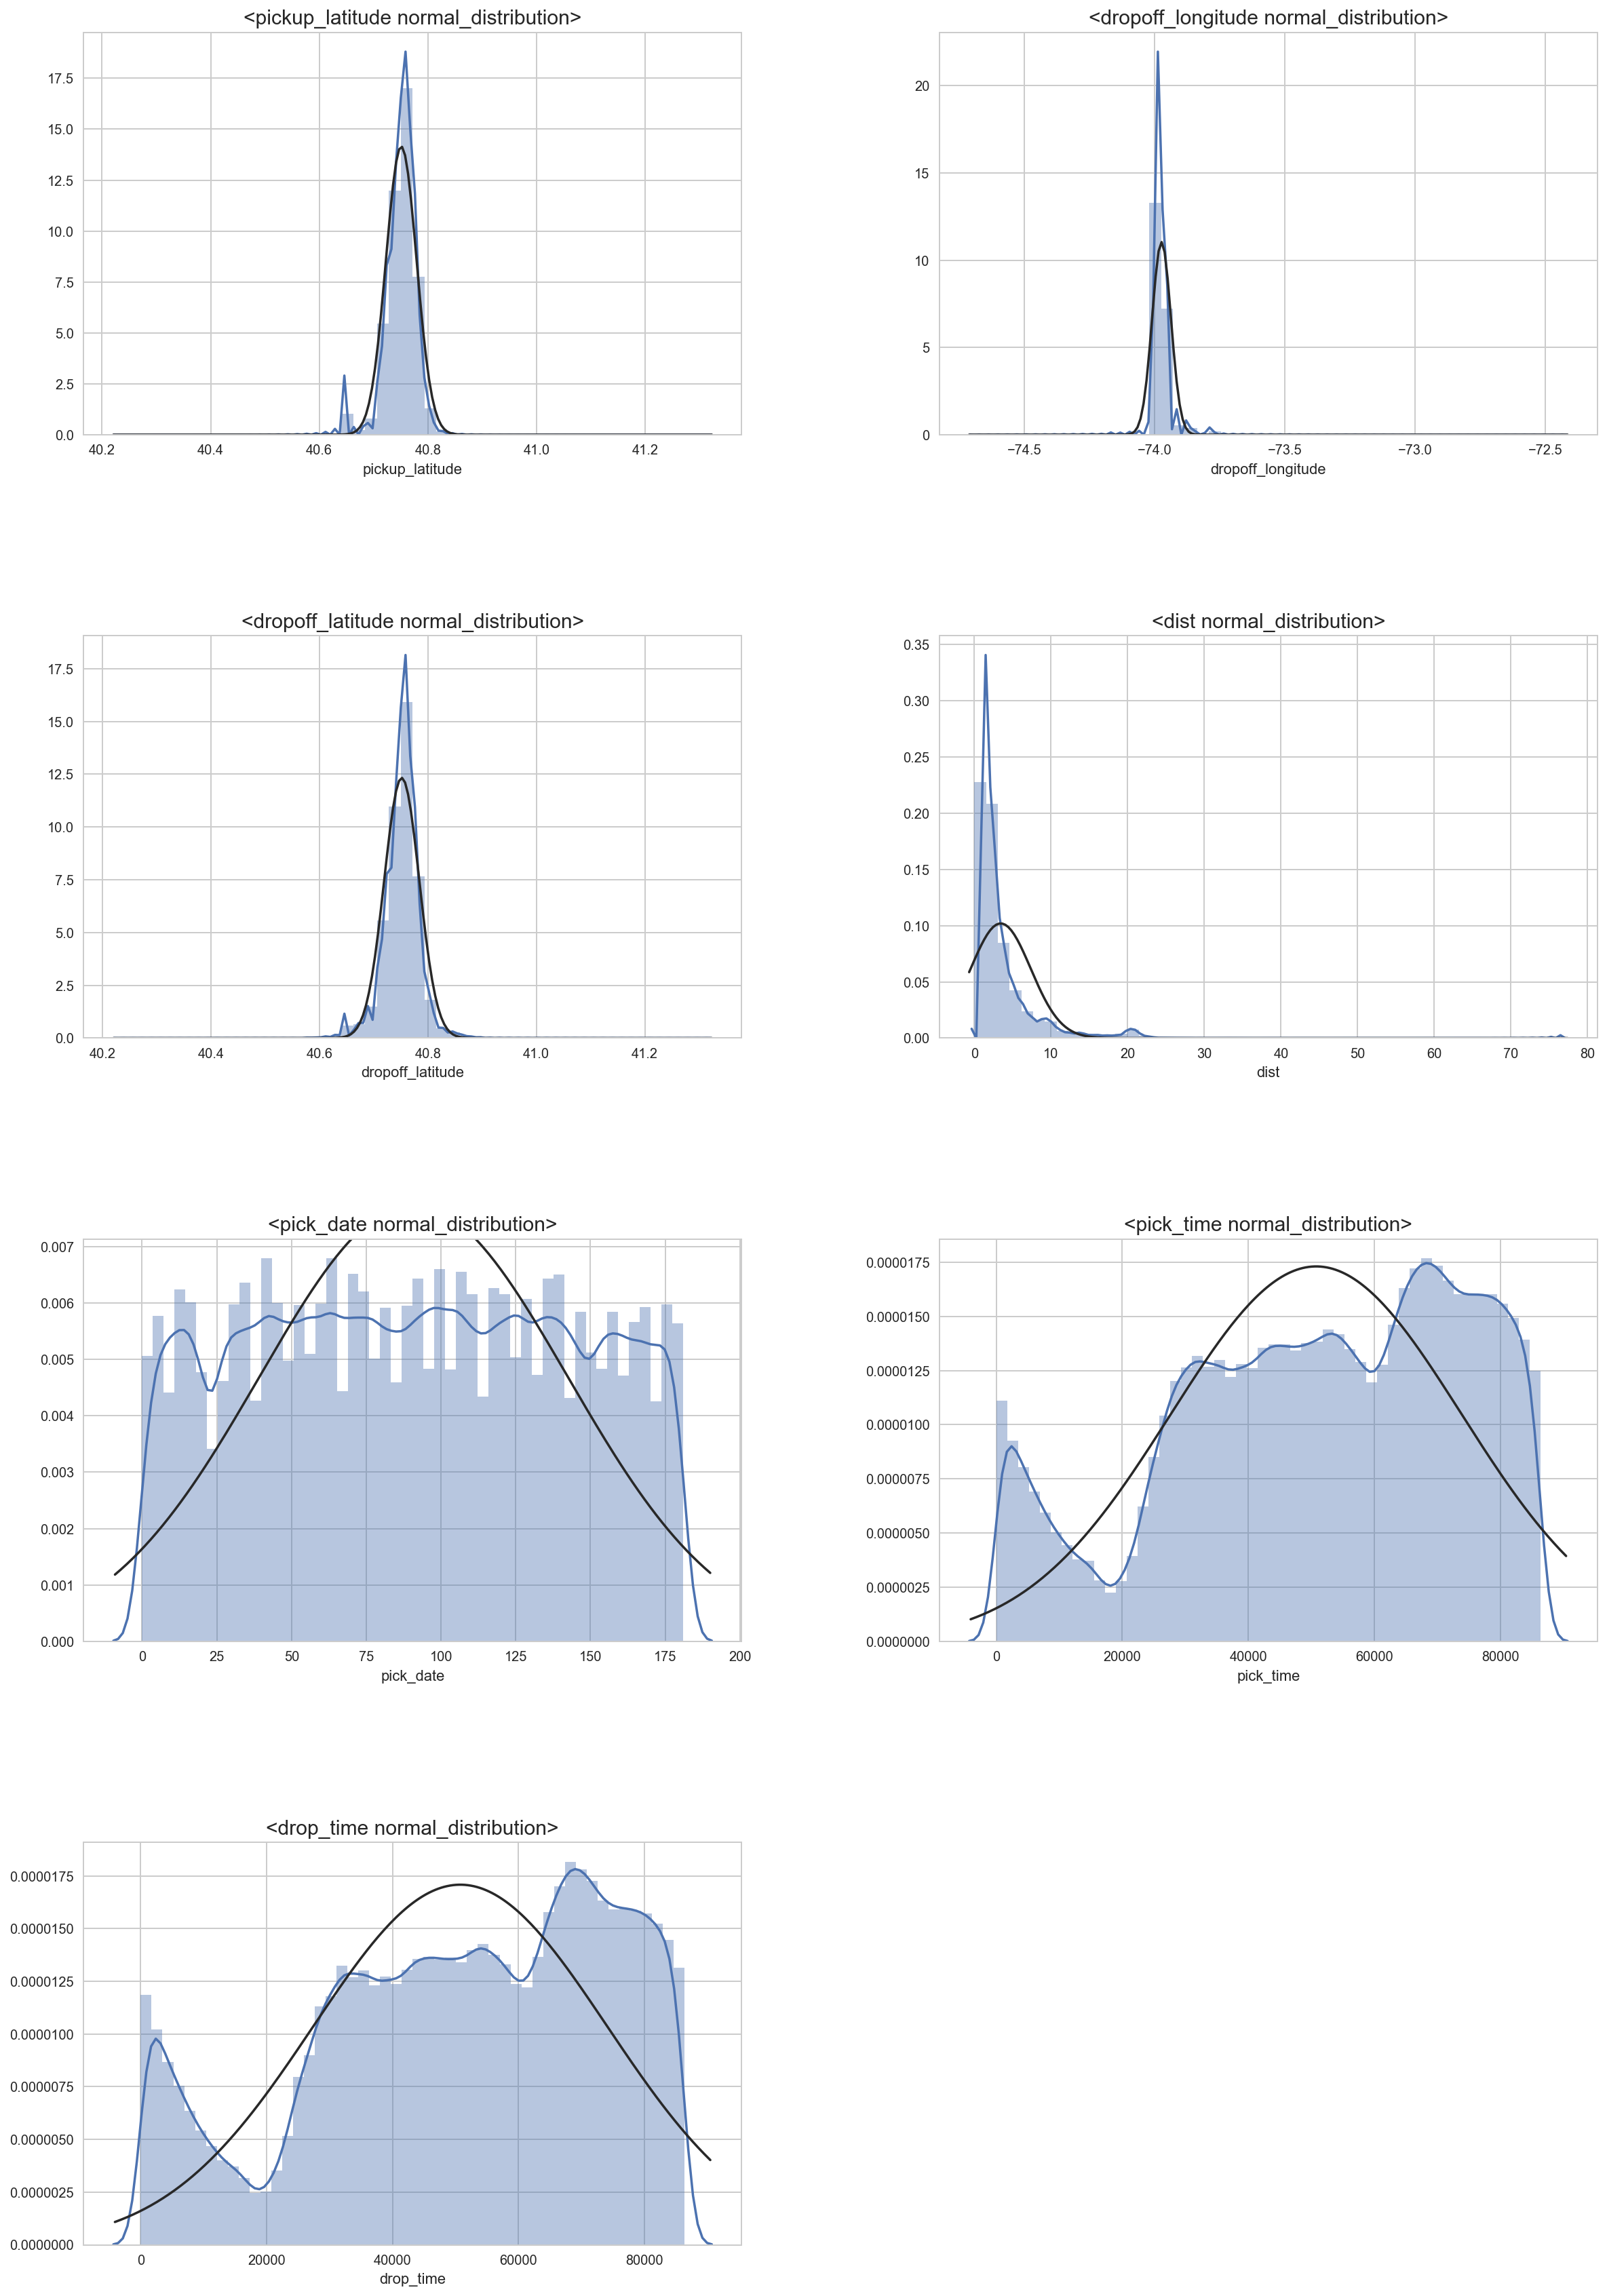

In [23]:
# 정규분포
plt.figure(figsize = (20, 30))
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)

# pickup_latitude 정규분포
plt.subplot(421)
sns.distplot(taxi_3['pickup_latitude'], kde = True, fit=sp.stats.norm)
plt.title('<pickup_latitude normal_distribution>', fontsize = 15)

# dropoff_longitude 정규분포
plt.subplot(422)
sns.distplot(taxi_3['dropoff_longitude'], kde = True, fit=sp.stats.norm)
plt.title('<dropoff_longitude normal_distribution>', fontsize = 15)

# dropoff_latitude 정규분포
plt.subplot(423)
sns.distplot(taxi_3['dropoff_latitude'], kde = True, fit=sp.stats.norm)
plt.title('<dropoff_latitude normal_distribution>', fontsize = 15)

# dist 정규분포
plt.subplot(424)
sns.distplot(taxi_3['dist'], kde = True, fit=sp.stats.norm)
plt.title('<dist normal_distribution>', fontsize = 15)

# pick_date 정규분포
plt.subplot(425)
sns.distplot(taxi_3['pick_date'], kde = True, fit = sp.stats.norm)
plt.title('<pick_date normal_distribution>', fontsize = 15)

# pick_time 정규분포
plt.subplot(426)
sns.distplot(taxi_3['pick_time'], kde=True, fit = sp.stats.norm)
plt.title('<pick_time normal_distribution>', fontsize = 15)

# drop_time 정규분포
plt.subplot(427)
sns.distplot(taxi_3['drop_time'], kde = True, fit = sp.stats.norm)
plt.title('<drop_time normal_distribution>', fontsize = 15)

plt.show()

## 3.5 Multicollinearity (다중공선성)

In [24]:
taxi_4 = taxi_3.drop(['Intercept', 'trip_duration'], axis = 1)
taxi_4.corr()

,id,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,dist,pick_date,pick_time,drop_time,weekday,holiday,vendor_id,passenger_count,store_and_fwd_flag
id,1.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00
pickup_longitude,0.00,1.00,-0.14,0.29,0.04,0.51,0.01,0.02,0.02,-0.03,0.01,0.02,0.00,0.02
pickup_latitude,-0.00,-0.14,1.00,0.05,0.43,-0.31,-0.00,0.01,0.02,-0.03,-0.00,0.00,-0.01,-0.01
dropoff_longitude,-0.00,0.29,0.05,1.00,0.13,0.36,0.01,-0.04,-0.04,-0.00,0.00,0.00,-0.00,0.02
dropoff_latitude,-0.00,0.04,0.43,0.13,1.00,-0.16,-0.00,0.02,0.02,-0.02,-0.00,0.00,-0.00,-0.01
dist,0.00,0.51,-0.31,0.36,-0.16,1.00,0.02,-0.02,-0.02,0.01,0.01,0.01,0.01,0.03
pick_date,0.00,0.01,-0.00,0.01,-0.00,0.02,1.00,-0.00,-0.00,-0.01,-0.14,-0.01,-0.00,0.00
pick_time,0.00,0.02,0.01,-0.04,0.02,-0.02,-0.00,1.00,0.93,-0.08,-0.01,0.01,0.01,0.00
drop_time,0.00,0.02,0.02,-0.04,0.02,-0.02,-0.00,0.93,1.00,-0.09,-0.01,0.01,0.01,0.00
weekday,-0.00,-0.03,-0.03,-0.00,-0.02,0.01,-0.01,-0.08,-0.09,1.00,-0.10,0.00,0.03,-0.00


In [26]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(taxi_4.values, i) for i in range(taxi_4.shape[1])]
vif["features"] = taxi_4.columns
vif

,VIF Factor,features
0,4.00,id
1,0.96,pickup_longitude
2,1.20,pickup_latitude
3,0.74,dropoff_longitude
4,1.12,dropoff_latitude
5,1.04,dist
6,1.02,pick_date
7,7.67,pick_time
8,7.68,drop_time
9,1.02,weekday


---

# Modeling

---

# Cross validation

---

# Kaggle result

---

# Conclusion